In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline 
      # Ensures Matplotlib plots appear directly inside the notebook  PROPERLY instead of opening in a separate window
import seaborn as sns

In [2]:
df =  pd.read_csv("Diwali Sales Data.csv", encoding="ISO-8859-1")   # To avoid encoding error we can use -> encoding="ISO-8859-1" OR encoding="unicode_escape"

In [3]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
df.info()    # Know about data structure 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# **Data Cleaning .....**

In [5]:
df.isnull().sum()     # OR pd.isnull(df).sum()  ---> Total null entries in each column

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

### 1. Deal with Null entries and Null Columns

In [6]:
df.drop(['Status', 'unnamed1'], axis= 1, inplace= True)

In [7]:
# Re-check
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# Replace NaN with the average of the "Amount" column
df['Amount'].fillna(df['Amount'].mean(), inplace=True)  # inplace = True -> makes changes permanently in df
# We can drop nul entry rows -> df.dropna(inplace=True)

C:\Users\umarm\AppData\Local\Temp\ipykernel_24508\711576490.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].mean(), inplace=True)  # inplace = True -> makes changes permanently in df


In [9]:
# Recheck
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### Dealing with Datatypes...

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11251 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [11]:
df['Amount'] = df['Amount'].astype('int')   # from float to int

In [12]:
# Recheck
df['Amount'].dtype

dtype('int64')

### High level Summary....

In [13]:
# Get Overall Summary
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.609901
std,1.716125e+03,12.754122,0.493632,1.115047,5219.569169
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [14]:
# Summary of reqd columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9453.609901
std,12.754122,1.115047,5219.569169
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.500000
50%,33.000000,2.000000,8110.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


In [15]:
# INSIGHTS:

-> We have customers of average age around 35yrs, average orders placed 2.5 with average amount 9500.

-> We have customers with min age 12yrs and max age near 92yrs.

## Exploratory Data Analysis (EDA)....

In [16]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,9453
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799


#### Impact of Gender

C:\Users\umarm\AppData\Local\Temp\ipykernel_24508\3162121890.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x = 'Gender', palette=["c", "y"])   # seaborn plot


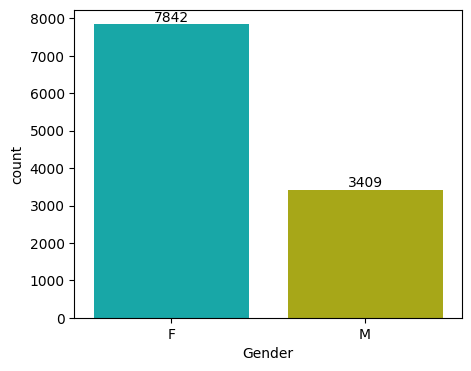

In [17]:
# Gender Distribution of customers
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x = 'Gender', palette=["c", "y"])   # seaborn plot

for container in ax.containers:
    ax.bar_label(container)     # matplotlib func to label each bar

In [18]:
# Insights
# Females have contributed more as customer count than males

In [19]:
genderDist = df.groupby(['Gender']).agg({"Amount":"sum"})
genderDist

,Amount
Gender,
F,74430383
M,31932182


Text(0.5, 1.0, 'Gender impact on Revenue')

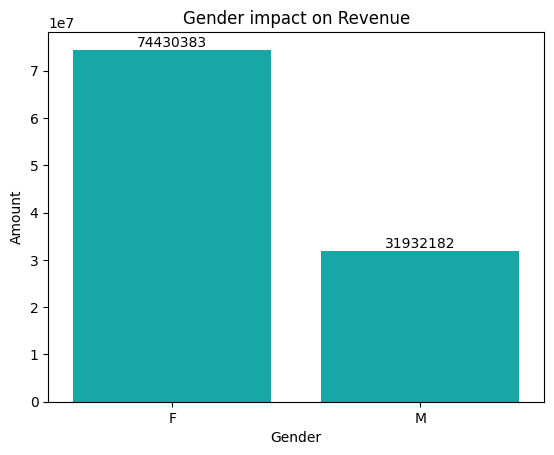

In [20]:
ax = sns.barplot(data=genderDist, x="Gender", y = "Amount", color="c")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")     # matplotlib func to label each bar --> fmt="%.0f"  format in whole number
plt.title("Gender impact on Revenue")

In [21]:
# Females have contributed more in sales revenue than mens.

#### Impact of Age

In [22]:
AG = df.groupby("Age Group").agg({"Amount":"sum", "User_ID":"count"})
AG

,Amount,User_ID
Age Group,,
0-17,2699653,296
18-25,17240732,1879
26-35,42632348,4543
36-45,22173353,2286
46-50,9245656,987
51-55,8280383,832
55+,4090440,428


In [23]:
# Customers with age between 25-50 have major impact on overall revenue.
# Old and very young people have less contributed in sales revenue.

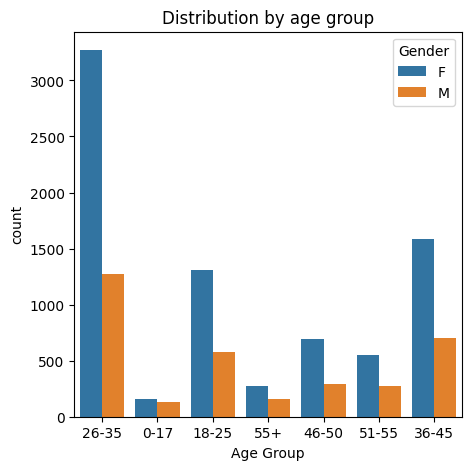

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(data=df , x='Age Group', hue='Gender')
plt.title("Distribution by age group")
plt.show()

In [25]:
# Most of the customers are in age group 26-35 with majority of females.

#### Impact of STATE (Which state has more sales)

In [26]:
# Check state wise orders
SG = df.groupby("State").agg({"Orders":"sum"}).sort_values(by="Orders", ascending=False)
SG

,Orders
State,
Uttar Pradesh,4813
Maharashtra,3811
Karnataka,3241
Delhi,2744
Madhya Pradesh,2259
Andhra Pradesh,2054
Himachal Pradesh,1568
Kerala,1137
Haryana,1109


In [27]:
# Top 5 highest ordered states     -------> UP, Maharashtra, karnataka, Delhi and MP
# Bottom 5 states with least orders   ----------> Telangana, Punjab, Rajasthan, Uttarakhand, Jharkhand

#### Marital Status

Marital_Status
0    6522
1    4729
Name: count, dtype: int64


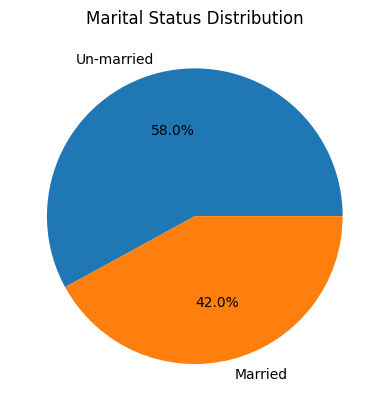

In [28]:
mc= df['Marital_Status'].value_counts()
print(mc)
plt.pie(mc, labels=["Un-married", "Married"], autopct='%1.1f%%')
plt.title('Marital Status Distribution')  
plt.show()


In [29]:
MS = df.groupby("Marital_Status").agg({"Amount":"sum", "Orders":"sum"})
MS

,Amount,Orders
Marital_Status,,
0,62163196,16258
1,44199369,11749


<Axes: xlabel='Marital_Status', ylabel='count'>

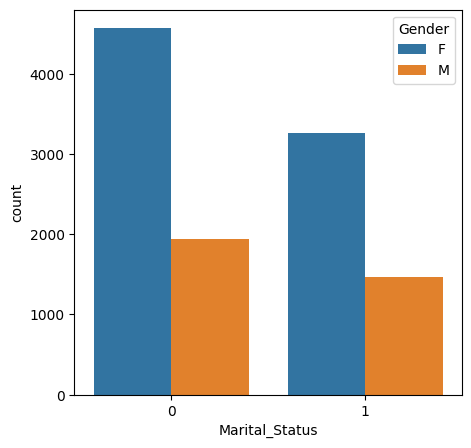

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(data=df, x= "Marital_Status", hue="Gender")

In [31]:
# Insights
# Unmarried people have contributed more in overall revenue (majority of females) with highest orders around 6 crore.

#### Occupation....

In [32]:
OG = df.groupby("Occupation").agg({"Amount":"sum"}).sort_values(by="Amount", ascending=False)
OG

,Amount
Occupation,
IT Sector,14802344
Healthcare,13034586
Aviation,12602298
Banking,10789516
Govt,8517212
Hospitality,6395311
Media,6295832
Automobile,5378049
Chemical,5306889


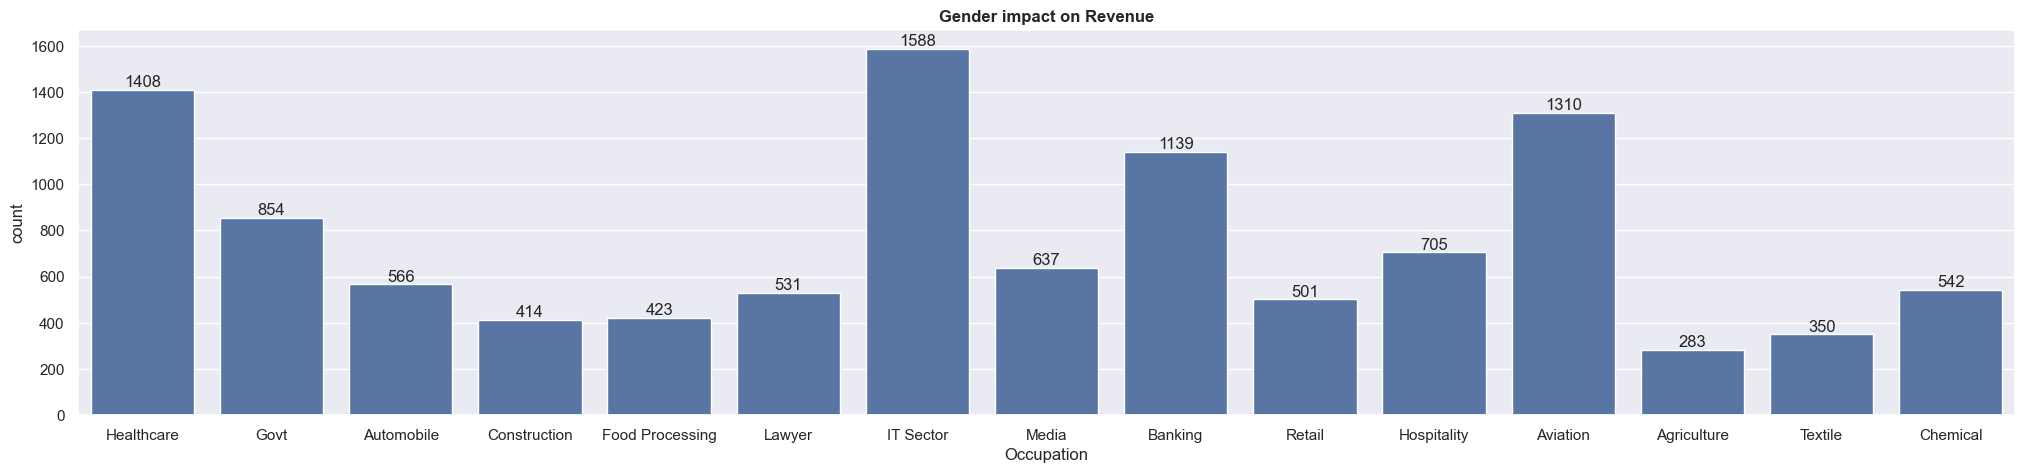

In [33]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(data=df, x= "Occupation")

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")     # matplotlib func to label each bar --> fmt="%.0f"  format in whole number
    
plt.title("Gender impact on Revenue", fontweight="bold")
plt.show()

In [34]:
# People from IT sectore spent more in diwali sales followed by healthcare, Aviation, & Banking.
# People from sectors like Agriculture, Textile,Construction & Food processing spent less in diwali.

#### Demanded Products ..............

In [35]:
df["Product_Category"]

0              Auto
1              Auto
2              Auto
3              Auto
4              Auto
            ...    
11246        Office
11247    Veterinary
11248        Office
11249        Office
11250        Office
Name: Product_Category, Length: 11251, dtype: object

In [36]:
OG = df.groupby("Product_Category").agg({"Amount":"sum", "Orders":"sum"}).sort_values(by="Amount", ascending=False)
OG

,Amount,Orders
Product_Category,,
Food,33962242,6120
Clothing & Apparel,16495019,6634
Electronics & Gadgets,15643846,5226
Footwear & Shoes,15622474,2654
Furniture,5449504,890
Games & Toys,4331694,940
Sports Products,3635933,870
Auto,1986968,246
Beauty,1959484,1086


In [37]:
# Insights
# Top 5 selling product_category --------> Food, Clothing & Apparel	, Electronics & Gadgets	, Footwear & Shoes	AND Furniture.

# **------------------ CONCLUSION (Insights) ---------------------------**

-> Majority of customers belong to age between 25 & 50.

-> Average orders placed by each customer is around 2.5 with average amount 9500.

-> Female customers are more than males both in number and in revenue contribution.
    
-> Unmarried people have contributed more in overall revenue (majority of females) with highest orders around 6 crore.

-> Top 5 highest ordered states:       UP, Maharashtra, karnataka, Delhi and MP
-> Bottom 5 states with least orders :  Telangana, Punjab, Rajasthan, Uttarakhand, Jharkhand

-> People from IT sector spent more in diwali sales followed by healthcare, Aviation, & Banking.
-> People from sectors like Agriculture, Textile, Construction & Food processing spent less in diwali.

-> Food, Clothing & Apparel	, Electronics & Gadgets	, Footwear & Shoes	AND Furniture are top selling product categories.